Saving Employee-Attrition-uml.csv to Employee-Attrition-uml (2).csv
Dataset Shape: (1470, 34)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 

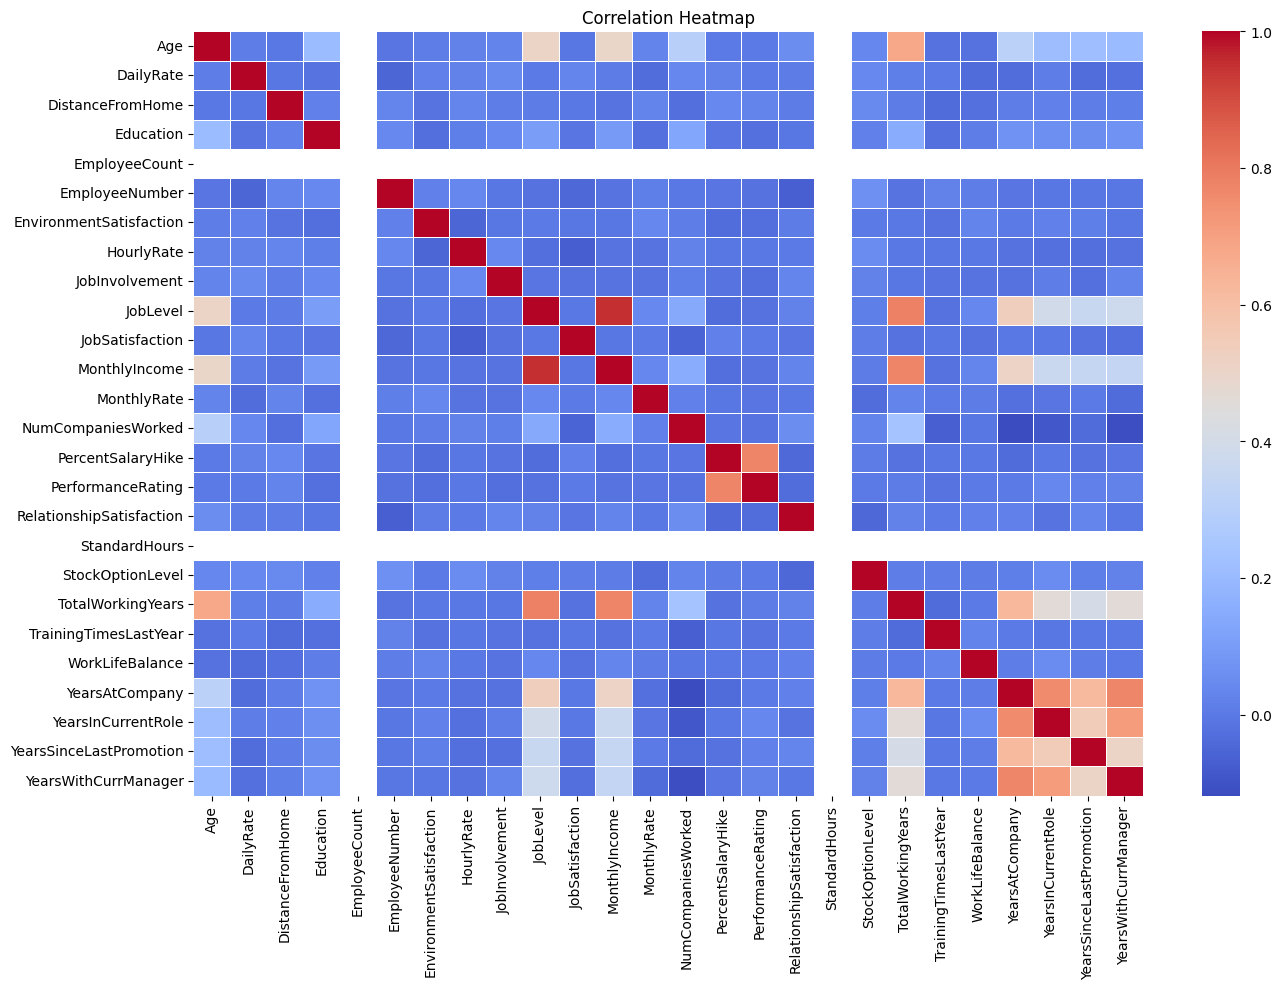

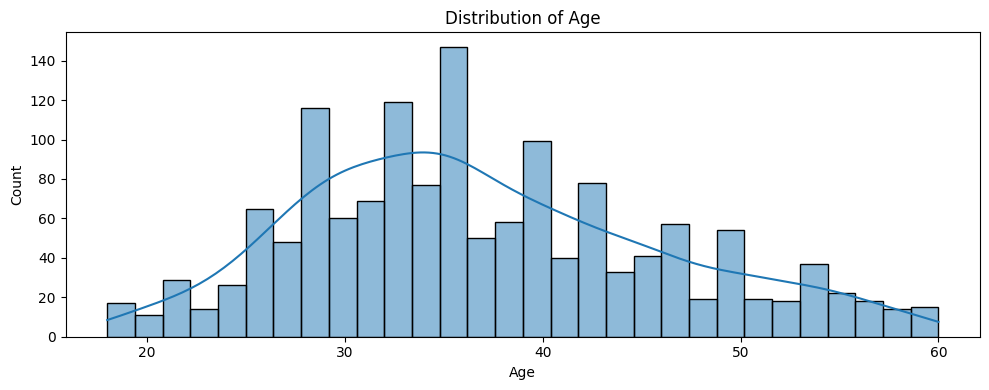

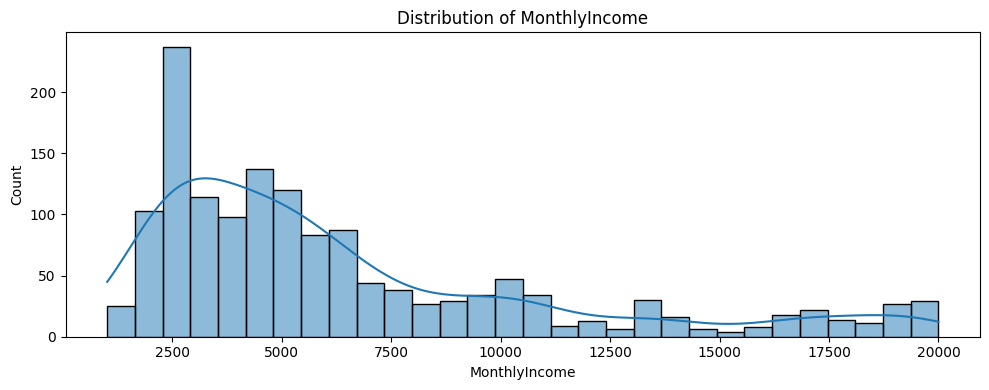

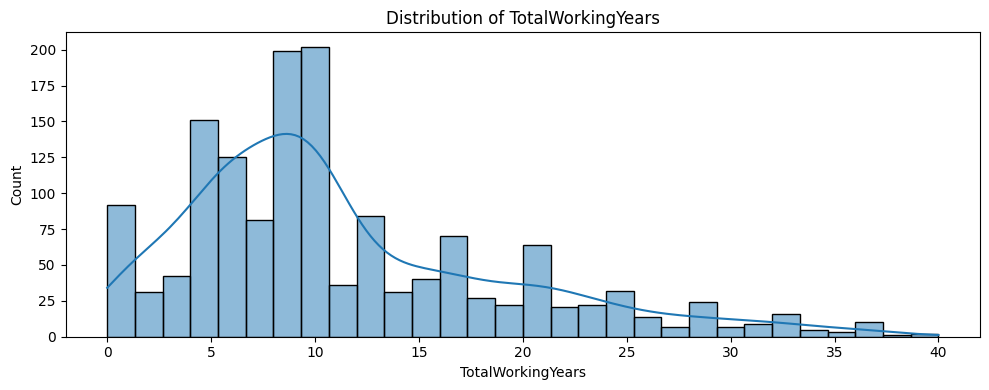

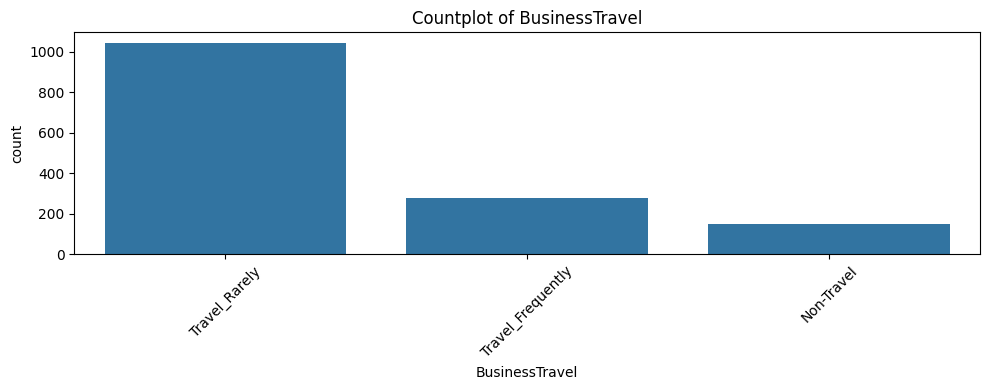

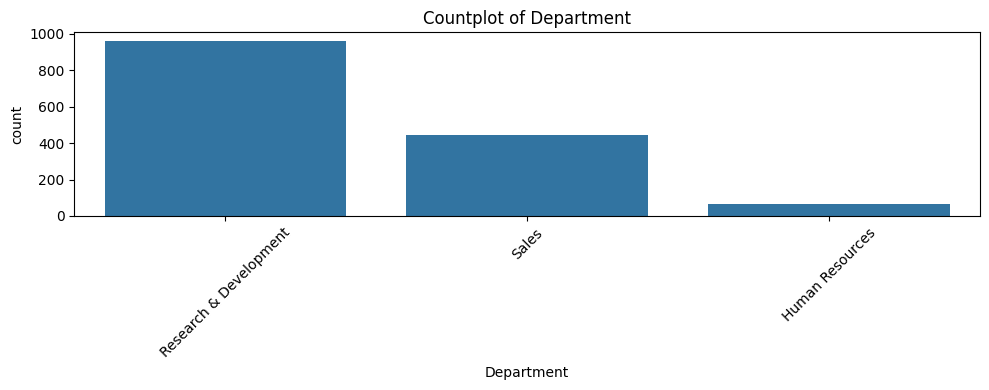

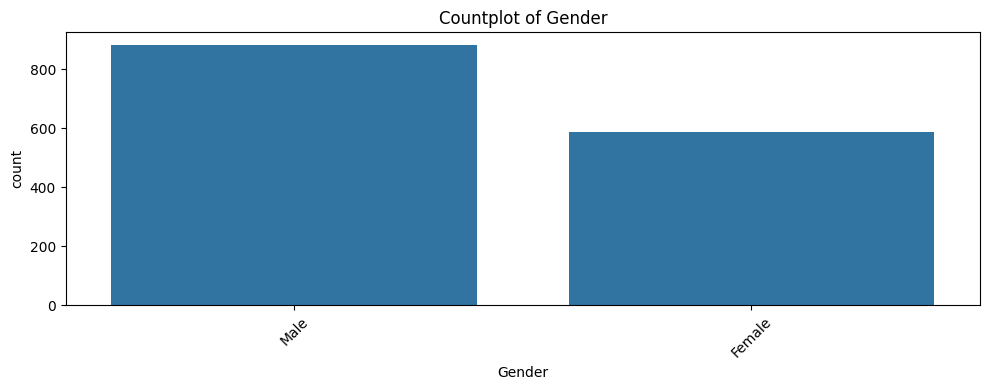

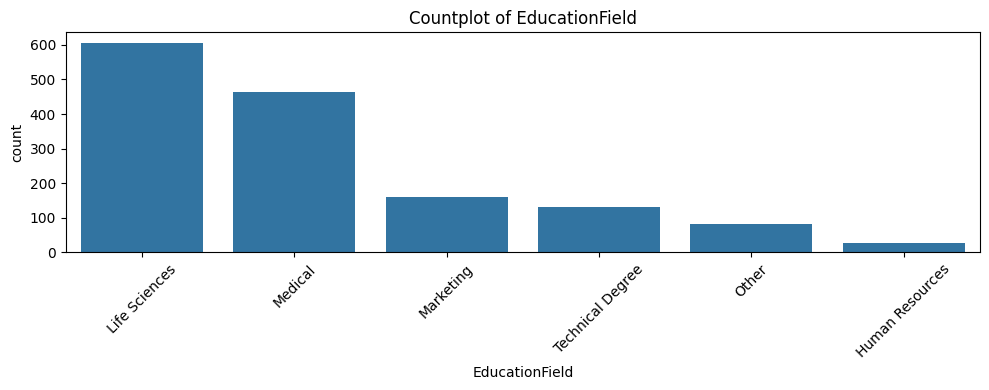

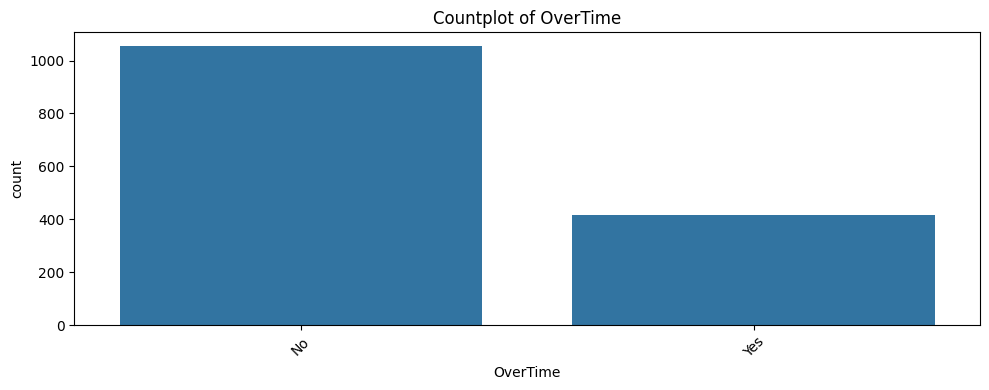

Attrition' column not found. Skipping violin plots.
'Attrition' column not found. Skipping pairplot.


In [ ]:
#EDA
#  Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#  Step 2: Upload CSV
from google.colab import files
uploaded = files.upload()

# Step 3: Load dataset
df = pd.read_csv("Employee-Attrition-uml.csv")

# Step 4: Overview
print("Dataset Shape:", df.shape)
print("\nInfo:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

# Step 5: Separate columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Step 6: Summary statistics
print("\nNumerical Summary:")
print(df[numeric_cols].describe())

print("\nCategorical Summary:")
print(df[categorical_cols].describe())

# Step 7: Create directory to save plots
os.makedirs("eda_plots", exist_ok=True)

# Step 8: Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("eda_plots/correlation_heatmap.png")
plt.show()

# Step 9: Distribution Plots
for col in ['Age', 'MonthlyIncome', 'TotalWorkingYears']:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.savefig(f"eda_plots/distribution_{col}.png")
    plt.show()

#Step 10: Count Plots for Categorical Features
for col in ['BusinessTravel', 'Department', 'Gender', 'EducationField', 'OverTime']:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"eda_plots/countplot_{col}.png")
    plt.show()

# Step 11: Attrition vs Categorical Features
if "Attrition" in df.columns:
    for col in ['Gender', 'BusinessTravel', 'Department', 'OverTime']:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, hue='Attrition')
        plt.title(f'Attrition by {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f"eda_plots/attrition_by_{col}.png")
        plt.show()

# Step 12: Attrition vs Numerical Features (Boxplots)
if "Attrition" in df.columns:
    for col in ['Age', 'MonthlyIncome', 'TotalWorkingYears']:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x='Attrition', y=col)
        plt.title(f'{col} by Attrition')
        plt.tight_layout()
        plt.savefig(f"eda_plots/boxplot_{col}_by_attrition.png")
        plt.show()
# Step 13: Violin plots for numeric features grouped by Attrition
if "Attrition" in df.columns:
    violin_features = ['Age', 'MonthlyIncome', 'TotalWorkingYears']
    for col in violin_features:
        if col in df.columns:
            plt.figure(figsize=(8, 4))
            sns.violinplot(data=df, x="Attrition", y=col, inner="box", palette="Set2")
            plt.title(f'{col} distribution by Attrition (Violin Plot)')
            plt.tight_layout()
            plt.savefig(f"eda_plots/violinplot_{col}_by_attrition.png")
            plt.show()
        else:
            print(f" Column '{col}' not found. Skipping violin plot.")
else:
    print("Attrition' column not found. Skipping violin plots.")

# Step 14: Pairplot of key numerical features by Attrition
df.columns = df.columns.str.strip()  # Ensure no whitespace issues
if "Attrition" in df.columns:
    selected_pairplot_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'Attrition']
    selected_pairplot_cols = [col for col in selected_pairplot_cols if col in df.columns]

    if len(selected_pairplot_cols) > 1:
        sns.pairplot(df[selected_pairplot_cols], hue="Attrition", diag_kind="kde", palette="husl")
        plt.suptitle("Pairplot of Selected Features by Attrition", y=1.02)
        plt.savefig("eda_plots/pairplot_attrition.png")
        plt.show()
    else:
        print("Not enough valid columns for pairplot.")
else:
    print("'Attrition' column not found. Skipping pairplot.")

k=2 | Silhouette: 0.4086, DBI: 0.9848
k=3 | Silhouette: 0.3814, DBI: 1.3817
k=4 | Silhouette: 0.4284, DBI: 0.7389
k=5 | Silhouette: 0.4081, DBI: 0.7511

--- Final Model Evaluation ---
Best k = 4
Silhouette Score: 0.4284
Davies-Bouldin Index: 0.7389


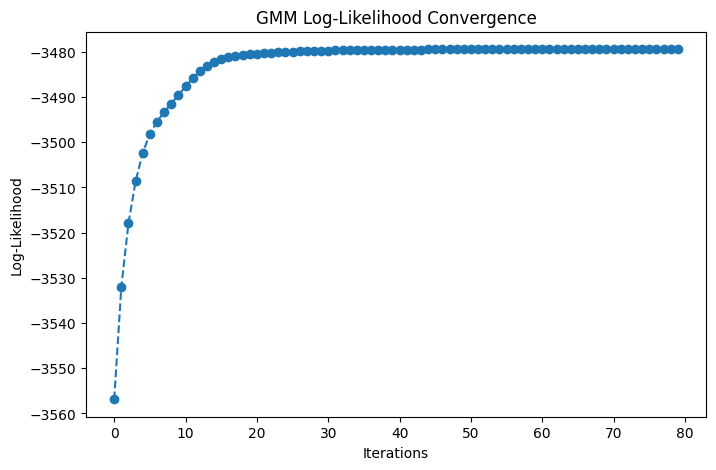

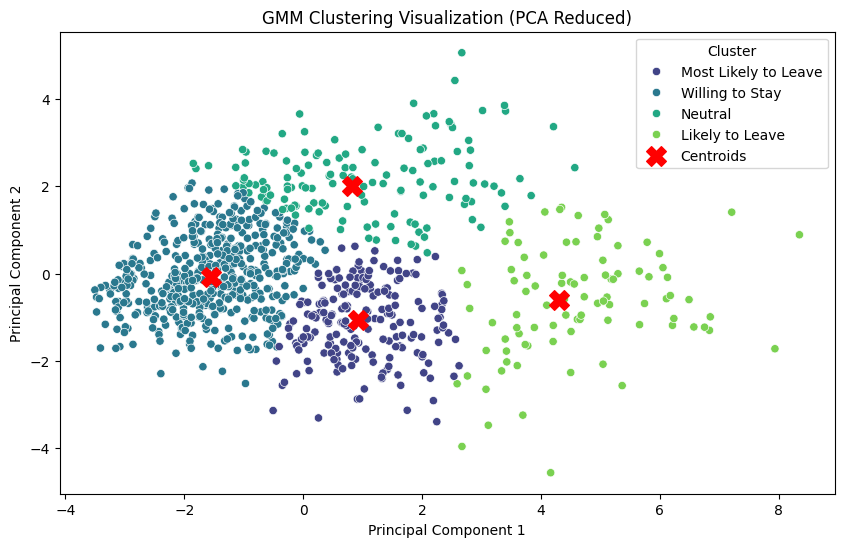

In [ ]:
# GMM Clustering with Evaluation and Optimal k Selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
import joblib

# Load dataset
file_path = "/content/Employee-Attrition-uml.csv"
df = pd.read_csv(file_path)

# Drop irrelevant columns
df_cleaned = df.drop(columns=["EmployeeCount", "EmployeeNumber", "StandardHours"], errors='ignore')

# Separate categorical and numerical features
categorical_cols = df_cleaned.select_dtypes(include=["object"]).columns
numerical_cols = df_cleaned.select_dtypes(exclude=["object"]).columns

# Label encode categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

# Standardize numerical features
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Split data
train_data, test_data = train_test_split(df_cleaned, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_data[numerical_cols])
X = X_pca
n, d = X.shape

# GMM using EM
def gmm_em(X, k, max_iter=100, tol=1e-4):
    n, d = X.shape
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    means = kmeans.cluster_centers_
    covariances = [np.cov(X.T) + np.eye(d) * 1e-4 for _ in range(k)]
    weights = np.ones(k) / k
    log_likelihoods = []

    for iteration in range(max_iter):
        responsibilities = np.zeros((n, k))
        for i in range(k):
            responsibilities[:, i] = weights[i] * multivariate_normal.pdf(X, mean=means[i], cov=covariances[i])
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)

        Nk = responsibilities.sum(axis=0)
        weights = Nk / n
        means = np.array([np.sum(responsibilities[:, i][:, np.newaxis] * X, axis=0) / Nk[i] for i in range(k)])

        covariances = []
        for i in range(k):
            diff = X - means[i]
            cov_matrix = np.diag((responsibilities[:, i][:, np.newaxis] * diff).T @ diff / Nk[i])
            covariances.append(np.diag(cov_matrix) + np.eye(d) * 1e-4)

        log_likelihood = np.sum(np.log(np.sum([
            weights[i] * multivariate_normal.pdf(X, mean=means[i], cov=covariances[i])
            for i in range(k)
        ], axis=0)))

        log_likelihoods.append(log_likelihood)
        if iteration > 0 and np.abs(log_likelihood - log_likelihoods[-2]) < tol:
            break

    labels = np.argmax(responsibilities, axis=1)
    return means, covariances, weights, labels, log_likelihoods

# Evaluate for different k
scores = []
ks = [2, 3, 4, 5]

for k in ks:
    means, covariances, weights, labels, log_likelihoods = gmm_em(X, k)
    silhouette = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)
    scores.append((k, silhouette, dbi))
    print(f"k={k} | Silhouette: {silhouette:.4f}, DBI: {dbi:.4f}")

# Final model for best k (k=4)
k = 4
means, covariances, weights, labels, log_likelihoods = gmm_em(X, k)
train_data["Cluster"] = labels

# Save GMM model parameters for use in Streamlit
joblib.dump(means, "gmm_means.pkl")
joblib.dump(covariances, "gmm_covariances.pkl")
joblib.dump(weights, "gmm_weights.pkl")

# Map labels
label_map = {
    0: "Willing to Stay",
    1: "Likely to Leave",
    2: "Neutral",
    3: "Most Likely to Leave"
}
train_data["Cluster_Label"] = train_data["Cluster"].map(label_map)

# Evaluation
silhouette_final = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
print("\n--- Final Model Evaluation ---")
print(f"Best k = {k}")
print(f"Silhouette Score: {silhouette_final:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

# Log-Likelihood plot
plt.figure(figsize=(8, 5))
plt.plot(log_likelihoods, marker="o", linestyle="--")
plt.xlabel("Iterations")
plt.ylabel("Log-Likelihood")
plt.title("GMM Log-Likelihood Convergence")
plt.show()

# Cluster Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=train_data["Cluster_Label"], palette="viridis")
plt.scatter(means[:, 0], means[:, 1], marker="X", s=200, c="red", label="Centroids")
plt.title("GMM Clustering Visualization (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
import joblib
import os

# Create models directory
os.makedirs("models", exist_ok=True)

# Save GMM components
joblib.dump(means, "models/gmm_means.pkl")
joblib.dump(covariances, "models/gmm_covariances.pkl")
joblib.dump(weights, "models/gmm_weights.pkl")

# Save PCA model
joblib.dump(pca, "models/gmm_pca.pkl")

# Save scaler
joblib.dump(scaler, "models/scaler.pkl")

# Save label encoders
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df[col])
    label_encoders[col] = le
joblib.dump(label_encoders, "models/label_encoders.pkl")

print("✅ All model components saved in /models")


✅ All model components saved in /models
